Import libraries 

In [1]:
import os
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Input, Dropout, Activation, Dense, BatchNormalization
from keras.constraints import maxnorm

from sklearn.model_selection import train_test_split


In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Create variables

In [3]:
IMG_SIZE=(180,180)
channels= 3
char_path=r'./the-simpsons-characters-dataset'

In [4]:
characters = []

for i in os.listdir(char_path):
    characters.append(i)
    print(i)

abraham_grampa_simpson
agnes_skinner
apu_nahasapeemapetilon
barney_gumble
bart_simpson
carl_carlson
charles_montgomery_burns
chief_wiggum
cletus_spuckler
comic_book_guy
disco_stu
edna_krabappel
fat_tony
gil
groundskeeper_willie
homer_simpson
kent_brockman
krusty_the_clown
lenny_leonard
lionel_hutz
lisa_simpson
maggie_simpson
marge_simpson
martin_prince
mayor_quimby
milhouse_van_houten
miss_hoover
moe_szyslak
ned_flanders
nelson_muntz
otto_mann
patty_bouvier
principal_skinner
professor_john_frink
rainier_wolfcastle
ralph_wiggum
selma_bouvier
sideshow_bob
sideshow_mel
snake_jailbird
troy_mcclure
waylon_smithers


Create dataset

In [5]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    char_path,
    image_size=IMG_SIZE,
    labels='inferred',
    shuffle=True,
    color_mode='grayscale',
    label_mode = 'categorical',
    class_names = characters,
    validation_split=0.2,
    seed=123,
    subset = "training",
)
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    char_path,
    image_size=IMG_SIZE,
    labels='inferred',
    shuffle=True,
    color_mode='grayscale',
    label_mode = 'categorical',
    class_names = characters,
    validation_split=0.2,
    seed=321,                                                          
    subset = "validation",
)

Found 20933 files belonging to 42 classes.
Using 16747 files for training.
Found 20933 files belonging to 42 classes.
Using 4186 files for validation.


In [6]:
def get_classname(lb, cha):
    for item in range(len(lb)):
        if lb[item] > 0:
            return cha[item]
    return ''


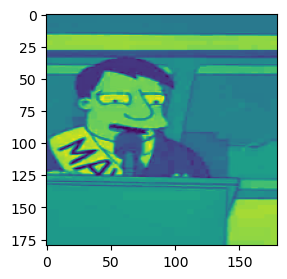

mayor_quimby


In [7]:
for image, label in train_data:
    img = tf.keras.preprocessing.image.array_to_img(image[0])
    plt.figure(figsize = (3,3))
    plt.imshow(img)
    plt.show()
    print(get_classname(label[0], characters))
    break

Create Model

In [8]:

model = tf.keras.models.Sequential([
    Conv2D(32, (3, 3), padding='same'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    BatchNormalization(),
    
    Conv2D(128, (3, 3), padding='same'),
    Activation('relu'),
    Dropout(0.2),
    BatchNormalization(),
    
    Flatten(),
    Dropout(0.2),
    
    Dense(256, kernel_constraint=maxnorm(3)),
    Activation('relu'),
    Dropout(0.2),
    BatchNormalization(),
    
    Dense(128, kernel_constraint=maxnorm(3)),
    Activation('relu'),
    Dropout(0.2),
    BatchNormalization(),
    
    Dense(len(characters)),
    Activation('softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.build(input_shape=(None, 180, 180, 1))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 180, 180, 32)      320       
_________________________________________________________________
activation (Activation)      (None, 180, 180, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 90, 90, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 90, 90, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 128)       36992     
_________________________________________________________________
activation_1 (Activation)    (None, 90, 90, 128)       0

In [ ]:
model.fit(
    train_data,
    epochs=25,
    validation_data=val_data)

Epoch 1/25


In [ ]:
scores = model.evaluate(val_data, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
model.save('my_model.h5')

In [ ]:
new_model = tf.keras.models.load_model('my_model.h5')